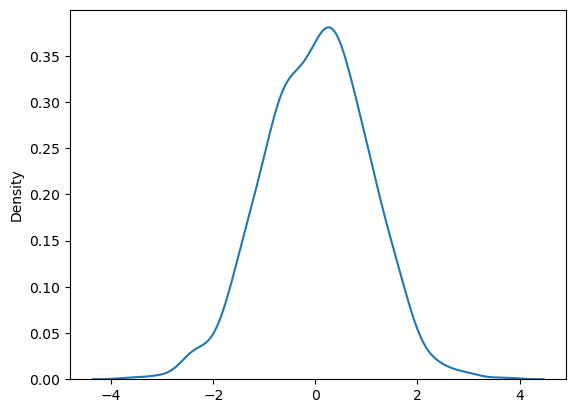

In [33]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_array = random.normal(size=1000)
sns.kdeplot(random_array)
# sns.distplot(random_array, hist=False)

plt.show() 

In [34]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


In [35]:
series

0      0.275168
1      0.291216
2      1.480237
3     -0.315135
4     -0.103542
         ...   
995    0.734935
996   -0.759531
997    0.688381
998   -0.207685
999   -1.035733
Length: 1000, dtype: float64

# Cреднее значение #

In [36]:
def my_mean(data):
    return sum(data) / len(data)

In [37]:
my_mean(series)

0.022108789344799897

In [38]:
np.mean(series)

0.022108789344799897

# Медиана #

In [39]:
def my_median(data):
    sort_data = sorted(data)
    if len(sort_data) % 2:
        return sort_data[len(sort_data)//2]
    else:
        return (sort_data[len(sort_data)//2 - 1] + sort_data[len(sort_data)//2]) / 2

In [40]:
my_median(series)

0.05835097711046067

In [41]:
np.median(series)

0.05835097711046067

# Cтандартное отклонение #

In [42]:
def my_std(data):
    n = len(data)
    mean_data = my_mean(data)
    res = 0
    for item in data:
        res += (item - mean_data)**2
    return (res / n)**(1/2)

In [43]:
my_std(series)

1.0112151536731029

In [44]:
np.std(series)

1.0112151536731029

# Межквартильный размах #

In [45]:
def my_interquartile_range(data):
    sort_data = sorted(data)
    n1 = int(.25 * len(data)) - 1
    n3 = int(.75 * len(data)) - 1
    return (sort_data[n3] + (sort_data[n3 + 1] - sort_data[n3]) / 2) - (sort_data[n1] + (sort_data[n1 + 1] - sort_data[n1]) / 2)

In [46]:
my_interquartile_range(series)

1.384826827698289

In [47]:
q1, q3 = np.percentile(series, [25, 75], method='midpoint')
q3 - q1

1.384826827698289

# 23-й перцентиль #

In [48]:
def my_percentile_23(data):
    sort_data = sorted(data)
    n = int(.23 * len(data)) - 1
    return sort_data[n] + (sort_data[n + 1] - sort_data[n]) / 2

In [49]:
my_percentile_23(series)

-0.7392181157359572

In [50]:
np.percentile(series, 23, method='midpoint')

-0.7392181157359572